In [14]:
# Load the necessary python libraries
from sklearn import cluster, decomposition, preprocessing, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib.colors import ListedColormap



In [2]:
# These are your plotting settings. 
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'figure.figsize' : [10,6],
                     })

# CSV File import

In [4]:
#Let's load the T1DEXI dataset and covert the dataset into a 'Data Frame', 
#which is an easier to read and use table format for storing data:
dataTable = pd.read_csv("dataT1DEXIstudyVideo_sedentary.csv")

# The head and tail command will show us the first or last 5 instance and all the associated attributes
dataTable.head()


,Minimum_HR,Maximum_HR,Average_HR,Delta_HR,Standard_Dev_SC,Maximum_SC,Average_SC,Sum_SC,Activity,Sedentary,ActivityCategorical
0,74.0,142.0,107.275362,11.0,7.861639,25.523438,4.497127,620.603515,Interval,0,2
1,60.0,136.0,103.466165,16.0,8.618894,29.583984,6.355175,845.238281,Interval,0,2
2,80.0,124.0,103.007143,18.0,7.867961,29.531250,4.551911,637.267578,Interval,0,2
3,68.0,139.0,107.043956,12.0,9.106513,26.539062,9.084233,1644.246094,Aerobic,0,1
4,61.0,133.0,96.032895,-29.0,8.639869,27.263672,8.162148,1240.646484,Aerobic,0,1


# Preprocess

In [5]:
#check if any nan values are present
check_nan_in_dataTable = dataTable.isnull().values.any()
print(check_nan_in_dataTable)

#if check_nan_in_df is true, remove the nan values with dropna()
clean_dataTable = dataTable.dropna()


True


# Scatter plot with different color for sedentary/exercise

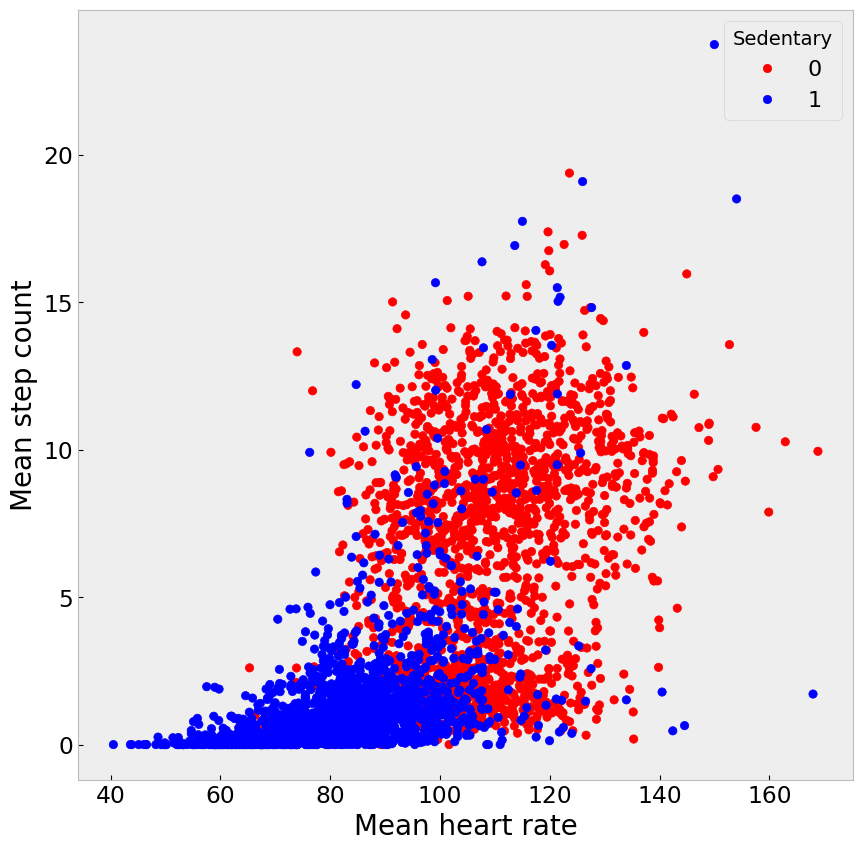

In [8]:
fig, ax = plt.subplots(figsize=[10,10])  #This creates an empty figure of size 10 by 10 inches

#For example we can create a scatter plot of mean hear rate on the x axis and mean step counts on the y axis, 
#and color coded by sedentary
colours = ListedColormap(['r','b'])
scatter = ax.scatter(clean_dataTable['Average_HR'], clean_dataTable['Average_SC'], c=clean_dataTable['Sedentary'],cmap=colours)
plt.xlabel('Mean heart rate', fontsize=20)
plt.ylabel('Mean step count', fontsize=20)
plt.legend(*scatter.legend_elements(),title="Sedentary",fontsize=16)
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.set_tick_params(labelsize='large')
# Note that a label of 0 is exercise and 1 is sedentary
plt.grid()
plt.show()

# Split the dataset into training and test sets

In [65]:
exerciseData_sedentaryClassifier=clean_dataTable.loc[:,['Minimum_HR','Maximum_HR','Average_HR',
                                                       'Delta_HR','Standard_Dev_SC','Maximum_SC',
                                                       'Average_SC','Sum_SC']]

# Split the dataset into training and test sets using sklearn's train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(exerciseData_sedentaryClassifier,
                                                                    clean_dataTable.Sedentary, 
                                                                    test_size=0.30,
                                                                    random_state=1)



# Dataset rescaling

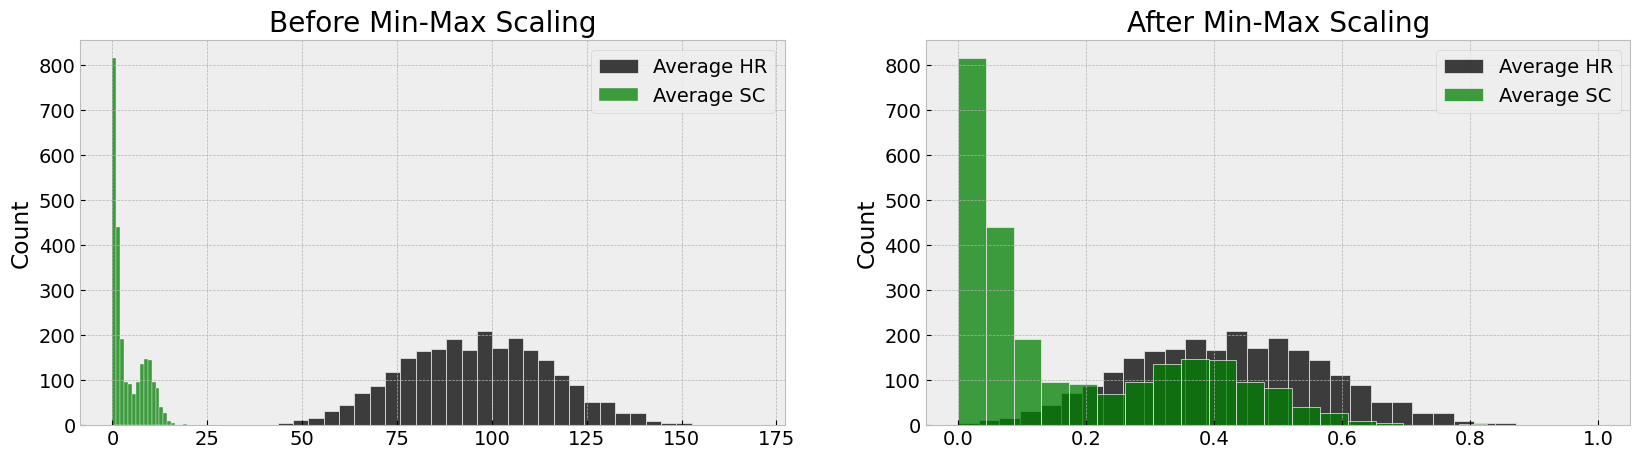

In [66]:
# Define a scaler which standardizes the data scales all 
#the data features in the range [0, 1] or else in the range [-1, 1] 
#if there are negative values in the dataset. 
#This usually improves stability and performance
scaler = preprocessing.MinMaxScaler().fit(X_train) 

#Apply the scaler to the input data
df_scaled_X = scaler.transform(X_train)
df_scaled_X_test = scaler.transform(X_test)

#No need to rescale the output data because they are categorical 
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()


#Plot the scaled features
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))

df_scaled = pd.DataFrame(df_scaled_X, columns =['Minimum_HR','Maximum_HR','Average_HR',
                                                       'Delta_HR','Standard_Dev_SC','Maximum_SC',
                                                       'Average_SC','Sum_SC'])
sns.histplot(X_train['Average_HR'], ax = ax1, color ='black')
sns.histplot(X_train['Average_SC'],ax = ax1, color ='g')
ax1.set_title('Before Min-Max Scaling')
ax1.set_xlabel('', fontsize=20)
ax1.legend(["Average HR","Average SC"])

sns.histplot(df_scaled['Average_HR'], ax = ax2, color ='black')
sns.histplot(df_scaled['Average_SC'],ax = ax2, color ='g')
ax2.set_title('After Min-Max Scaling')
ax2.set_xlabel('', fontsize=20)
ax2.legend(["Average HR","Average SC"])


# Model identification 

In [67]:
# Define a logistic regression classifier with 5000 iterations, and a fixed random state of 1
logReg_model = LogisticRegression(multi_class='multinomial', max_iter=5000, random_state=1) 
# Fit the logistic regression model to the full training set
logReg_model.fit(df_scaled_X, y_train) 
 
print('Training Error: ',logReg_model.score(df_scaled_X, y_train)) # Print the training and test errors
print('Test Error: ', logReg_model.score(df_scaled_X_test, y_test))
print('The model coefficients are: ', logReg_model.coef_, logReg_model.intercept_)

Training Error:  0.9397832195905259
Test Error:  0.9307116104868914
The model coefficients are:  [[-1.20202728  1.79745074 -5.35217708 -1.17655916 -3.52142254  0.51935555
  -3.47341852  8.11386066]] [3.62218089]


# Model testing 

In [69]:
predictedClass=logReg_model.predict(df_scaled_X_test)
probability=logReg_model.predict_proba(df_scaled_X_test)*100


# Model Evaluation 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuray:  0.9307116104868914
F1-score:  0.9306997022170623
Precision:  0.9312836775931748
Recall:  0.9320050600885516


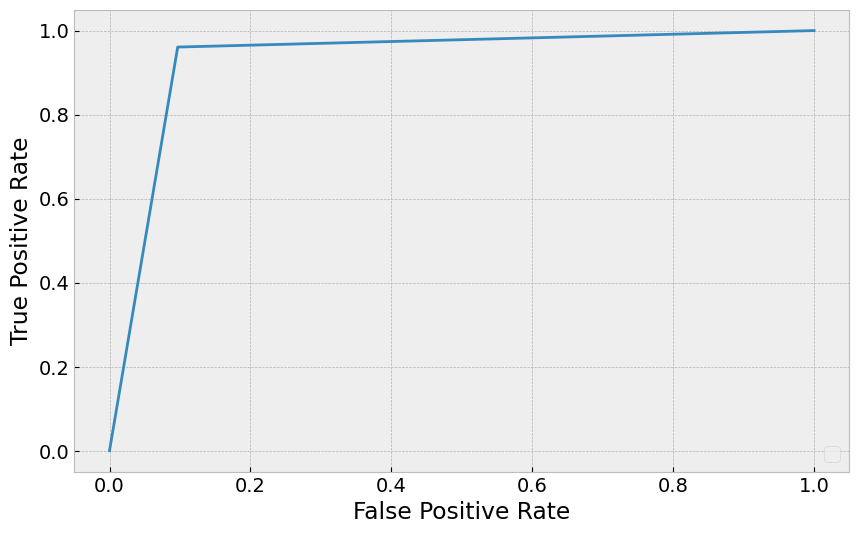

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay 

accuracy=accuracy_score(y_test,predictedClass)
f1=f1_score(y_test,predictedClass,average='macro')
precision=precision_score(y_test,predictedClass, average='macro')
recall=recall_score(y_test,predictedClass, average='macro')

print('Accuray: ', accuracy)
print('F1-score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)


fpr, tpr, thresholds = roc_curve(y_test,predictedClass, pos_label=logReg_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


# Confusion Matrix

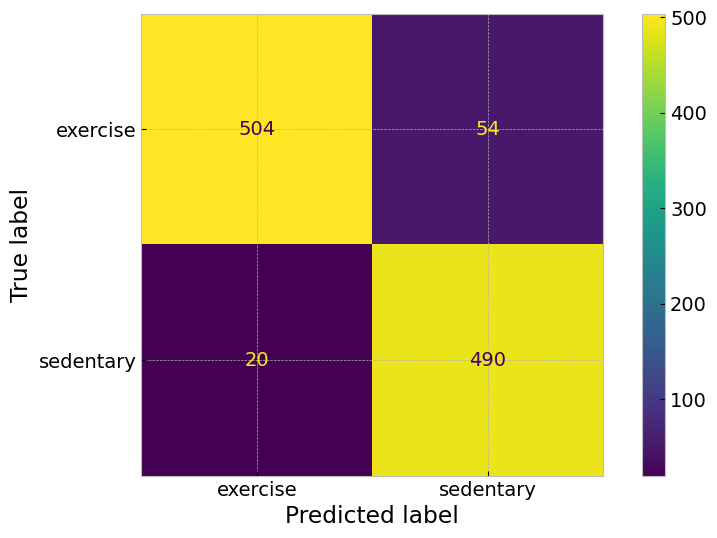

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictedClass, labels=logReg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['exercise','sedentary'])

disp.plot()
plt.show()
